## Inspect the transverse velocities of the dSphs to build prior for Crater II

In [6]:
import sys
sys.path.append('../dSphs/code/')
from data_stats_models import M31data, MWdata
velocities = pd.read_csv('proper_motion_data.dat',sep=' ')
import sys
sys.path.append('../TGAS/')
from sergey_2mass import ml_mb
mw = MWdata().data
from astropy.coordinates import SkyCoord
import astropy.units as u
with_vel = mw[mw.absV<-8.6].reset_index(drop=True)
with_vel['ra'] = SkyCoord(with_vel['GLON'],with_vel['GLAT'],frame='galactic',unit=u.deg).icrs.ra.rad
with_vel['dec'] = SkyCoord(with_vel['GLON'],with_vel['GLAT'],frame='galactic',unit=u.deg).icrs.dec.rad
velocities=with_vel.merge(velocities,how='inner',on='Name')

In [12]:
import aa_py
pot = aa_py.GalPot('/data/jls/tact/tact/aa/pot/PJM16_best.Tpot')
Solar = np.array([8.2,0.014,11.1,12.24+np.sqrt(-8.2*pot.Forces(np.array([8.2,0.,0.]))[0]),7.25])
cart = np.array([aa_py.GalacticToCartesian(aa_py.EquatorialToGalactic(np.array([a,d,s,vr,pma,pmd])),Solar)
                for (a,d,s,vr,pma,pmd) in zip(velocities['ra'],velocities['dec'],np.power(10.,0.2*velocities['DistMod']-2.),
                                            velocities['vlos'],velocities['pmra'],velocities['pmdec'])])

In [22]:
vr = np.sum([cart[:,i]*cart[:,i+3] for i in range(3)],axis=0)/np.sqrt(np.sum(cart[:,:3]**2,axis=1))
vtotal = np.sqrt(np.sum(cart[:,3:]**2,axis=1))

In [23]:
vt = np.sqrt(vtotal**2-vr**2)

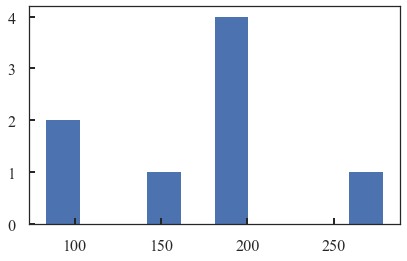

In [28]:
plt.hist(vt);plt.show()

In [30]:
np.mean(vt)/np.sqrt(2.)

123.06934039181785

In [31]:
np.mean(vt)

174.04633029441976

In [42]:
veldisp=140.
samples = np.random.multivariate_normal(mean=np.zeros(2),cov=np.diag(np.ones(2))*veldisp**2,
                                        size=50000)

In [43]:
np.mean(np.sqrt(samples.T[0]**2+samples.T[1]**2))

175.31222113380247

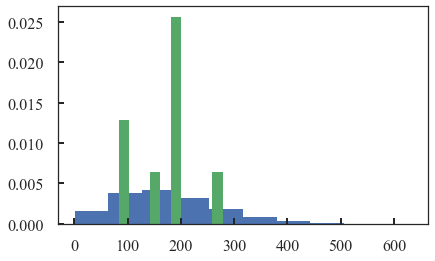

In [46]:
plt.hist(np.sqrt(samples.T[0]**2+samples.T[1]**2),normed=True);
plt.hist(vt,normed=True);plt.show()
plt.show()

In [47]:
vt

array([  83.59907531,  158.16799615,  200.25528302,   98.13362431,
        278.44076946,  194.55198188,  189.47204848,  189.74986374])

In [48]:
velocities.Name

0        Carina
1         Draco
2        Fornax
3          LeoI
4         LeoII
5      Sculptor
6    Sextans(I)
7     UrsaMinor
Name: Name, dtype: object